In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#let us set random seed
np.random.seed(42)


#Define the number of samples-100
num_samples=100

#Generate the synthetic data
carbon_emission= np.random.uniform(50,400,num_samples)  #Emissions in hypothetical units
renewability_index=np.random.uniform(0,1,num_samples)  #Index from 0(non renewable) to 1(renewable)
energy_output=np.random.uniform(100.1000,num_samples)   #Energy Output
cost_efficiency=np.random.uniform(0.5,5,num_samples)    #Cost efficiency Scopre

#Generate a binary target variable based on a Condition
sustainability=[1 if (emission<200 and renewability> 0.5 and cost <3)else 0
                for emission,renewability, cost in zip(carbon_emission,renewability_index, cost_efficiency)]
#Create the dataframe
df= pd.DataFrame(
    {
        'carbon_emission':carbon_emission,
        'renewability_index':renewability_index,
        'energy_output':energy_output,
        'cost_efficiency':cost_efficiency,
        'sustainability':sustainability
    }
)

In [2]:
#display the first 5 rows and last 5 rows
print(df.head())
print(df.tail())

   carbon_emission  renewability_index  energy_output  cost_efficiency  \
0       181.089042            0.031429     100.035797         0.878630   
1       382.750007            0.636410     100.035797         1.227329   
2       306.197880            0.314356     100.035797         4.543494   
3       259.530469            0.508571     100.035797         3.228931   
4       104.606524            0.907566     100.035797         0.541387   

   sustainability  
0               0  
1               0  
2               0  
3               0  
4               1  
    carbon_emission  renewability_index  energy_output  cost_efficiency  \
95       222.828459            0.349210     100.035797         3.964971   
96       232.956490            0.725956     100.035797         1.471195   
97       199.639356            0.897110     100.035797         3.303007   
98        58.896694            0.887086     100.035797         0.884064   
99        87.761999            0.779876     100.035797      

In [3]:
df.isnull().sum()  # to check the missig values- if missing values are present ,use df.fillna(df.mean())

carbon_emission       0
renewability_index    0
energy_output         0
cost_efficiency       0
sustainability        0
dtype: int64

In [5]:
df.columns

Index(['carbon_emission', 'renewability_index', 'energy_output',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [4]:
#feature selection
X =df[['carbon_emission','energy_output','renewability_index','cost_efficiency']]#Feature
y=df['sustainability'] #Target


In [7]:
#train and test sets
X_train ,X_test, y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
X_train.shape

(80, 4)

In [9]:
X_test.shape

(20, 4)

In [10]:
# training the model
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [12]:
#Accuracy Score
acc= accuracy_score(y_test,y_pred)
print(f'Accuracy Score is {acc}')

Accuracy Score is 0.95


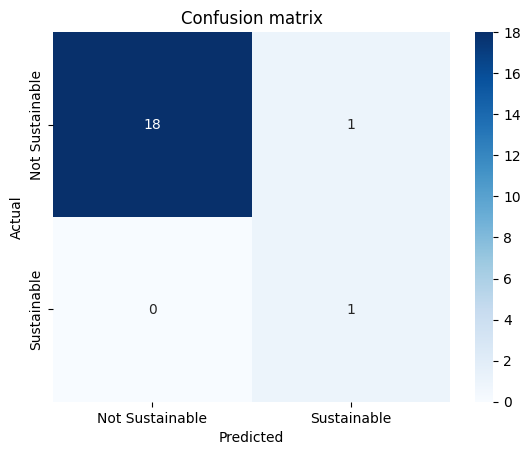

In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',
            xticklabels=['Not Sustainable','Sustainable'],
            yticklabels=['Not Sustainable','Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [15]:
# Classification Report
print(classification_report(y_test,y_pred, target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       1.00      0.95      0.97        19
    Sustainable       0.50      1.00      0.67         1

       accuracy                           0.95        20
      macro avg       0.75      0.97      0.82        20
   weighted avg       0.97      0.95      0.96        20



In [17]:
coef= pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coef)

                    Coefficient
carbon_emission       -0.015770
energy_output          0.023921
renewability_index     1.652267
cost_efficiency       -1.189090


In [16]:
import joblib
joblib.dump(model,'Logistic regression.pkl')

['Logistic regression.pkl']